In [1]:
!pip install matplotlib
!pip install sklearn

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
%matplotlib inline

In [3]:
df=pd.read_csv("市政府(兩個月資料).csv")
df.drop("Unnamed: 0",inplace=True,axis=1)

In [4]:
# df=pd.read_sql_query('SELECT * from Youbike_data',db)

In [5]:
# df['time']=pd.to_datetime(df['time'])
# df.set_index('time',inplace=True)
# test=df.loc['2021-03-30-00:00:00':'2021-05-14-23:59:00']


In [6]:
df.head()

,stop,time,tot,sbi,temp,Wind,humid
0,1,2021-03-28 02:22:28,180,5,21.4,1,91
1,2,2021-03-28 02:22:28,48,7,21.4,1,91
2,3,2021-03-28 02:22:28,40,6,21.4,1,91
3,4,2021-03-28 02:22:28,60,10,21.4,1,91
4,5,2021-03-28 02:22:28,60,17,21.4,1,91


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423680 entries, 0 to 423679
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   stop    423680 non-null  int64  
 1   time    423680 non-null  object 
 2   tot     423680 non-null  int64  
 3   sbi     423680 non-null  int64  
 4   temp    423680 non-null  float64
 5   Wind    423680 non-null  int64  
 6   humid   423680 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 22.6+ MB


In [8]:
df.describe()

,stop,tot,sbi,temp,Wind,humid
count,423680.00000,423680.000000,423680.000000,423680.00000,423680.000000,423680.000000
mean,92.50000,49.700000,16.477566,25.51774,1.680655,77.357817
std,96.65336,32.907637,17.041778,4.19430,0.704453,13.706911
min,1.00000,30.000000,0.000000,15.90000,0.000000,1.000000
25%,6.50000,30.000000,6.000000,22.50000,1.000000,68.000000
50%,72.50000,39.000000,13.000000,25.70000,2.000000,78.000000
75%,141.00000,54.000000,21.000000,28.40000,2.000000,88.000000
max,326.00000,180.000000,168.000000,38.10000,4.000000,99.000000


In [9]:
confirmed_case=pd.read_csv('covid_19.csv')
confirmed_case.head()

,ID,國家,檢核日期,確診數,死亡數,解除隔離數,隔離中人數,解封指數,7天平均解封指數,7天平均新增確診數,14天平均新增確診數,交流距離
0,75461,TW/Taiwan,2021-06-06,11298,260,1133,9905,9.207,7.913,448.29,498.29,3777.46
1,75462,TW/Taiwan,2021-06-05,10956,224,1133,9599,8.872,7.497,450.00,506.71,3956.59
2,75463,TW/Taiwan,2021-06-04,10446,187,1133,9126,8.388,7.084,447.29,521.93,3954.68
3,75464,TW/Taiwan,2021-06-03,9974,166,1133,8675,7.952,6.675,459.00,510.64,3978.73
4,75465,TW/Taiwan,2021-06-02,9389,149,1133,8107,7.420,6.256,471.14,489.71,3868.99


In [10]:
confirmed_case=confirmed_case.iloc[:,[2,3]]
confirmed_case.columns=['time','confirmed_cases']
confirmed_case['time']=pd.to_datetime(confirmed_case.time)
confirmed_case.set_index('time',inplace=True)
confirmed_case.head()

,confirmed_cases
time,
2021-06-06,11298
2021-06-05,10956
2021-06-04,10446
2021-06-03,9974
2021-06-02,9389


In [11]:
confirmed_case.describe()

,confirmed_cases
count,54.000000
mean,3244.555556
std,3240.077804
min,1067.000000
25%,1111.500000
50%,1204.500000
75%,4768.250000
max,11298.000000


In [12]:
confirmed_case['daily_cases']=confirmed_case['confirmed_cases'].diff(-1)
confirmed_case.dropna(inplace=True)
confirmed_case.head()

,confirmed_cases,daily_cases
time,,
2021-06-06,11298,342.0
2021-06-05,10956,510.0
2021-06-04,10446,472.0
2021-06-03,9974,585.0
2021-06-02,9389,547.0


In [13]:
confirmed_case.drop('confirmed_cases',inplace=True,axis=1)
confirmed_case.tail()

,daily_cases
time,
2021-04-19,3.0
2021-04-18,1.0
2021-04-17,2.0
2021-04-16,2.0
2021-04-15,1.0


In [14]:
confirmed_case['join_date']=confirmed_case.index.dayofyear
confirmed_case.head()

,daily_cases,join_date
time,,
2021-06-06,342.0,157
2021-06-05,510.0,156
2021-06-04,472.0,155
2021-06-03,585.0,154
2021-06-02,547.0,153


In [15]:
df.head()

,stop,time,tot,sbi,temp,Wind,humid
0,1,2021-03-28 02:22:28,180,5,21.4,1,91
1,2,2021-03-28 02:22:28,48,7,21.4,1,91
2,3,2021-03-28 02:22:28,40,6,21.4,1,91
3,4,2021-03-28 02:22:28,60,10,21.4,1,91
4,5,2021-03-28 02:22:28,60,17,21.4,1,91


In [16]:
from sklearn.preprocessing import LabelEncoder
df['time']=pd.to_datetime(df['time'])
df['ratio']=round(df['sbi']/df['tot'],3).astype('float')
def get_condition(ratio):
    if ratio<=0.2:
        return "缺車" #0
    elif ratio<=0.5:
        return '少車' #g1
    elif ratio<=0.8:
        return '正常' #2
    else:
        return "滿車" #3
df['condition']=df['ratio'].agg(get_condition)
labelencoder = LabelEncoder()
#df['labeled_condition']=labelencoder.fit_transform(df['condition'])
df['labeled_condition']=df['condition'].replace({'缺車':0,'少車':1,'正常':2,'滿車':3})
df['labeled_condition']=df['labeled_condition'].astype(int)
df['labeled_stop']=labelencoder.fit_transform(df['stop'])

df['join_date']=df.time.dt.dayofyear
df['hour']=df.time.dt.hour
df['minute']=df.time.dt.minute
df['weekend'] = ((df.time.dt.weekday) // 5 == 1).astype(int)

df.head(100)



,stop,time,tot,sbi,temp,Wind,humid,ratio,condition,labeled_condition,labeled_stop,join_date,hour,minute,weekend
0,1,2021-03-28 02:22:28,180,5,21.4,1,91,0.028,缺車,0,0,87,2,22,1
1,2,2021-03-28 02:22:28,48,7,21.4,1,91,0.146,缺車,0,1,87,2,22,1
2,3,2021-03-28 02:22:28,40,6,21.4,1,91,0.150,缺車,0,2,87,2,22,1
3,4,2021-03-28 02:22:28,60,10,21.4,1,91,0.167,缺車,0,3,87,2,22,1
4,5,2021-03-28 02:22:28,60,17,21.4,1,91,0.283,少車,1,4,87,2,22,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,150,2021-03-28 02:55:01,38,21,21.0,1,92,0.553,正常,2,15,87,2,55,1
96,187,2021-03-28 02:55:01,34,12,21.0,1,92,0.353,少車,1,16,87,2,55,1
97,218,2021-03-28 02:55:01,42,20,21.0,1,92,0.476,少車,1,17,87,2,55,1
98,282,2021-03-28 02:55:01,30,13,21.0,1,92,0.433,少車,1,18,87,2,55,1


In [17]:
import numpy as np
# df['Td']=df['temp']-(100-df['humid'])/5
df['Td']=round(np.power(df['humid']/100,1/8)*(112+0.9*df['temp'])+0.1*df['temp']-112,2)
df['THI']=round(df['temp']-0.55*(1-np.exp((17.269*df['Td'])/(df['Td']+237.3))/np.exp((17.269*df['temp'])/(df['temp']+237.3)))*(df['temp']-14),2)

def convert_comfortability(THI):
    if THI<=15:
        return "寒冷"
    elif THI<=19:
        return "稍寒"
    elif THI<=26:
        return "舒適"
    elif THI<=30:
        return "悶熱"
    else:
        return "易中暑"
df['weather_condition']=df['THI'].agg(convert_comfortability)
df['weather_condition']=df['weather_condition'].astype(str)
df['weather_condition_coded']=df['weather_condition'].replace({"寒冷":0,"稍寒":1,"舒適":2,"悶熱":3,"易中暑":4})
df.head()

,stop,time,tot,sbi,temp,Wind,humid,ratio,condition,labeled_condition,labeled_stop,join_date,hour,minute,weekend,Td,THI,weather_condition,weather_condition_coded
0,1,2021-03-28 02:22:28,180,5,21.4,1,91,0.028,缺車,0,0,87,2,22,1,19.86,21.03,舒適,2
1,2,2021-03-28 02:22:28,48,7,21.4,1,91,0.146,缺車,0,1,87,2,22,1,19.86,21.03,舒適,2
2,3,2021-03-28 02:22:28,40,6,21.4,1,91,0.150,缺車,0,2,87,2,22,1,19.86,21.03,舒適,2
3,4,2021-03-28 02:22:28,60,10,21.4,1,91,0.167,缺車,0,3,87,2,22,1,19.86,21.03,舒適,2
4,5,2021-03-28 02:22:28,60,17,21.4,1,91,0.283,少車,1,4,87,2,22,1,19.86,21.03,舒適,2


In [18]:
df.loc[df['weather_condition']=='悶熱']

,stop,time,tot,sbi,temp,Wind,humid,ratio,condition,labeled_condition,labeled_stop,join_date,hour,minute,weekend,Td,THI,weather_condition,weather_condition_coded
8140,1,2021-03-29 12:30:02,180,15,29.0,1,64,0.083,缺車,0,0,88,12,30,0,21.51,26.03,悶熱,3
8141,2,2021-03-29 12:30:02,48,19,29.0,1,64,0.396,少車,1,1,88,12,30,0,21.51,26.03,悶熱,3
8142,3,2021-03-29 12:30:02,40,0,29.0,1,64,0.000,缺車,0,2,88,12,30,0,21.51,26.03,悶熱,3
8143,4,2021-03-29 12:30:02,60,22,29.0,1,64,0.367,少車,1,3,88,12,30,0,21.51,26.03,悶熱,3
8144,5,2021-03-29 12:30:02,60,13,29.0,1,64,0.217,少車,1,4,88,12,30,0,21.51,26.03,悶熱,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423675,150,2021-06-10 13:55:02,38,19,33.3,2,59,0.500,少車,1,15,161,13,55,0,24.24,28.97,悶熱,3
423676,187,2021-06-10 13:55:02,34,26,33.3,2,59,0.765,正常,2,16,161,13,55,0,24.24,28.97,悶熱,3
423677,218,2021-06-10 13:55:02,42,24,33.3,2,59,0.571,正常,2,17,161,13,55,0,24.24,28.97,悶熱,3
423678,282,2021-06-10 13:55:02,30,5,33.3,2,59,0.167,缺車,0,18,161,13,55,0,24.24,28.97,悶熱,3


In [19]:
merge=pd.merge(df,confirmed_case, how='left', on='join_date')
# merge=df
merge.set_index('time',inplace=True)
merge=merge['2021-03-30-00:00:00':'2021-05-14-23:59:00']
merge.fillna(0,inplace=True)
merge.head()

,stop,tot,sbi,temp,Wind,humid,ratio,condition,labeled_condition,labeled_stop,join_date,hour,minute,weekend,Td,THI,weather_condition,weather_condition_coded,daily_cases
time,,,,,,,,,,,,,,,,,,,
2021-03-30 00:00:01,1,180,0,23.3,0,92,0.000,缺車,0,0,89,0,0,0,21.92,22.89,舒適,2,0.0
2021-03-30 00:00:01,2,48,1,23.3,0,92,0.021,缺車,0,1,89,0,0,0,21.92,22.89,舒適,2,0.0
2021-03-30 00:00:01,3,40,0,23.3,0,92,0.000,缺車,0,2,89,0,0,0,21.92,22.89,舒適,2,0.0
2021-03-30 00:00:01,4,60,14,23.3,0,92,0.233,少車,1,3,89,0,0,0,21.92,22.89,舒適,2,0.0
2021-03-30 00:00:01,5,60,9,23.3,0,92,0.150,缺車,0,4,89,0,0,0,21.92,22.89,舒適,2,0.0


In [20]:
merge.groupby("stop").get_group(1).describe()

,stop,tot,sbi,temp,Wind,humid,ratio,labeled_condition,labeled_stop,join_date,hour,minute,weekend,Td,THI,weather_condition_coded,daily_cases
count,13127.0,13127.0,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.0,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000,13127.000000
mean,1.0,180.0,35.050278,23.965316,1.807191,76.255809,0.194747,0.481755,0.0,111.526396,11.502323,27.495620,0.261217,19.225096,22.525865,2.004190,4.850994
std,0.0,0.0,31.773430,3.967065,0.730634,13.831100,0.176500,0.632755,0.0,13.263595,6.923064,17.263108,0.439315,3.724362,3.099820,0.531842,6.942498
min,1.0,180.0,0.000000,15.900000,0.000000,1.000000,0.000000,0.000000,0.0,89.000000,0.000000,0.000000,0.000000,-29.260000,15.740000,1.000000,0.000000
25%,1.0,180.0,8.000000,21.000000,1.000000,66.000000,0.044000,0.000000,0.0,100.000000,6.000000,12.500000,0.000000,16.560000,20.160000,2.000000,0.000000
50%,1.0,180.0,29.000000,23.700000,2.000000,77.000000,0.161000,0.000000,0.0,112.000000,12.000000,25.000000,0.000000,19.820000,22.560000,2.000000,3.000000
75%,1.0,180.0,55.000000,26.800000,2.000000,87.000000,0.306000,1.000000,0.0,123.000000,18.000000,45.000000,1.000000,22.090000,24.960000,2.000000,6.000000
max,1.0,180.0,168.000000,36.800000,4.000000,99.000000,0.933000,3.000000,0.0,134.000000,23.000000,55.000000,1.000000,25.760000,29.660000,3.000000,34.000000


In [21]:
test=merge.groupby("stop").get_group(1).drop(['stop','tot','ratio','condition','labeled_stop','join_date','Td','THI','weather_condition'],axis=1)

In [22]:
test.corr().round(2)

,sbi,temp,Wind,humid,labeled_condition,hour,minute,weekend,weather_condition_coded,daily_cases
sbi,1.00,-0.20,0.14,0.02,0.92,0.15,-0.00,0.23,-0.22,-0.23
temp,-0.20,1.00,-0.26,-0.46,-0.20,0.14,0.00,-0.04,0.81,0.53
Wind,0.14,-0.26,1.00,-0.29,0.12,0.10,-0.01,0.05,-0.25,-0.20
humid,0.02,-0.46,-0.29,1.00,0.05,-0.17,-0.00,0.02,-0.23,-0.20
labeled_condition,0.92,-0.20,0.12,0.05,1.00,0.13,-0.00,0.23,-0.21,-0.20
hour,0.15,0.14,0.10,-0.17,0.13,1.00,-0.00,-0.00,0.10,0.00
minute,-0.00,0.00,-0.01,-0.00,-0.00,-0.00,1.00,-0.00,0.00,-0.00
weekend,0.23,-0.04,0.05,0.02,0.23,-0.00,-0.00,1.00,-0.03,-0.22
weather_condition_coded,-0.22,0.81,-0.25,-0.23,-0.21,0.10,0.00,-0.03,1.00,0.50
daily_cases,-0.23,0.53,-0.20,-0.20,-0.20,0.00,-0.00,-0.22,0.50,1.00


In [23]:
merge.drop(['sbi','condition','ratio','tot','join_date','Td',"THI","weather_condition","temp","humid"],axis=1,inplace=True)
merge.head()

,stop,Wind,labeled_condition,labeled_stop,hour,minute,weekend,weather_condition_coded,daily_cases
time,,,,,,,,,
2021-03-30 00:00:01,1,0,0,0,0,0,0,2,0.0
2021-03-30 00:00:01,2,0,0,1,0,0,0,2,0.0
2021-03-30 00:00:01,3,0,0,2,0,0,0,2,0.0
2021-03-30 00:00:01,4,0,1,3,0,0,0,2,0.0
2021-03-30 00:00:01,5,0,0,4,0,0,0,2,0.0


In [24]:
print(merge.isna().sum())

stop                       0
Wind                       0
labeled_condition          0
labeled_stop               0
hour                       0
minute                     0
weekend                    0
weather_condition_coded    0
daily_cases                0
dtype: int64


In [25]:
merge['stop']=merge['stop'].astype(str)

In [26]:
def get_target(df):
    y=df['labeled_condition']
    X=df.drop(['labeled_condition'],axis=1)
    return [X,y]

In [27]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import RidgeCV

## 定義feature selection function


In [81]:
def feature_selection(X,y,num_feat):
#     fig,axes=plt.subplots(3,figsize=(10,10))
#     rfe_rf=RFE(estimator=RandomForestRegressor(),n_features_to_select=1,verbose=1)#random forest
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#     rfe_rf.fit(X_train,y_train)
#     rf_mask=rfe_rf.support_
#     print(f"RandomForest-support:{rfe_rf.support_}")
#     print(f"RandomForest-ranking:{rfe_rf.ranking_}")
#     rf_score=[num_feat-i for i in rfe_rf.ranking_]
#     total_score=[rf_score[i] for i in range(0,num_feat)]
#     print(f"RF_total_score: {total_score}")
#     axes[0].plot(X.columns,total_score)
#     axes[0].set_xlabel("Features")
#     axes[0].set_ylabel("Importance")
#     axes[0].tick_params(labelrotation=45)
    
#     laCV=LassoCV() #LassoCV
    scaler=StandardScaler()
    X_train_std=scaler.fit_transform(X_train)
    X_test_std=scaler.fit_transform(X_test)
#     laCV.fit(X_train_std,y_train)
#     axes[1].plot(X.columns,np.absolute(laCV.coef_))
#     axes[1].set_xlabel("Features")
#     axes[1].set_ylabel("Importance")
#     axes[1].tick_params(labelrotation=45)
#     print(f"Lasocv:{laCV.coef_}")
#     print(f"lassoAlpha:{laCV.alpha_}")
    
    ridge = RidgeCV()
    ridge.fit(X_train_std, y_train)
    plt.plot(X.columns,np.absolute(ridge.coef_))
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.figure(figsize=(10,4))
    plt.xticks(["風","小時","分鐘","假日","天氣狀況","每日確診人數"],rotation=45)
    print(f"Ridge Features sorted by their score:{ridge.coef_}")
    print(f"Ridgecv alpha:{ridge.alpha_}")
#     fig.tight_layout()
    
#     lcv_mask=np.absolute(laCV.coef_)>0.001
#     meta_mask=np.sum([lcv_mask,rf_mask],axis=0)#加總三個模型的投票結果
#     print(meta_mask)
#     mask=meta_mask>2
#     reduced_X=X.loc[:,mask]
#     print(reduced_X.columns)
    return reduced_X

# 目標場站資料


In [29]:
df_stop_1=merge.groupby('labeled_stop').get_group(0)
df_stop_1.drop(['stop','minute'],inplace=True,axis=1)
df_stop_1.tail()

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Wind,labeled_condition,labeled_stop,hour,weekend,weather_condition_coded,daily_cases
time,,,,,,,
2021-05-14 23:35:01,1,0,0,23,0,3,34.0
2021-05-14 23:40:01,1,0,0,23,0,3,34.0
2021-05-14 23:45:01,1,0,0,23,0,3,34.0
2021-05-14 23:50:01,1,0,0,23,0,3,34.0
2021-05-14 23:55:01,1,0,0,23,0,3,34.0


In [30]:
def plot_station_condition(target,time):
    labeled_condition=[]
    for i in range(0,24):
        hour=target.groupby('hour').get_group(i)
        mean=hour.labeled_condition.mean()
        labeled_condition.append(mean.round(0))
    df_condition_daily=pd.DataFrame(labeled_condition)
    line=plt.plot(df_condition_daily,color="orange")
    plt.setp(line,marker='o')
    plt.yticks([0,1,2,3])
    plt.xticks(range(0,24))
    plt.xlabel("Time")
    plt.ylabel("stop_condition")
    plt.title(f"Average stop conditions on {time} before outbreak")

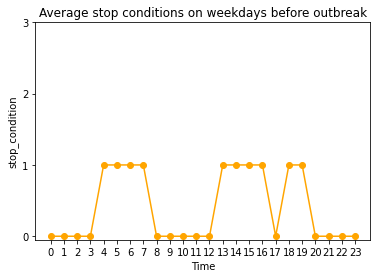

In [31]:
df_stop_daily=df_stop_1.loc[df_stop_1['weekend']==0]
plot_station_condition(df_stop_daily,"weekdays")

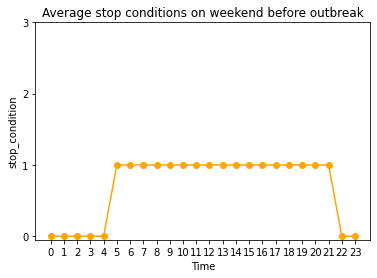

In [32]:
df_stop_weekend=df_stop_1.loc[df_stop_1['weekend']==1]
plot_station_condition(df_stop_weekend,"weekend")

In [33]:
labeled_condition=[]
df_stop_daily=df_stop_1.loc[df_stop_1['weekend']==0]
for i in range(0,24):
    hour=df_stop_1.groupby('hour').get_group(i)
    mean=hour.labeled_condition.mean()
    labeled_condition.append(mean.round(0))
print(labeled_condition)

[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0]


In [ ]:
stop_1_X,stop_1_Y=get_target(df_stop_1)
stop_1_X.shape

In [ ]:
stop_1_Y.shape

# 預測random forest



In [ ]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
def get_RF_result(X,y):
    weighted_avg=[]
    accuracy=[]

    steps=[('scaler',StandardScaler()),('rf',RandomForestClassifier(n_estimators=100))]
    pipeline=Pipeline(steps)

    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    print(pipeline.score(X_test,y_test))
    print(classification_report(y_test, y_pred))
#         weighted_avg.append(result['weighted avg'])
#         accuracy.append(result['accuracy'])
    return pipeline


In [ ]:
result=get_RF_result(stop_1_X,stop_1_Y) 

In [ ]:
rf_accuracy


In [ ]:
def plot_result(weighted_avg,accuracy,x,xlabel):
#     precision=[weighted_avg[i]['precision'] for i in range(0,len(x))]
#     recall=[weighted_avg[i]['recall'] for i in range(0,len(x))]
#     f1score=[weighted_avg[i]['f1-score'] for i in range(0,len(x))]
#     plt.plot(x,precision)
#     plt.plot( x,recall)
#     plt.plot( x,f1score)
    plt.plot(x,accuracy)
    plt.legend(['accuracy'])
    plt.xlabel(xlabel)
    plt.xticks(x)

In [ ]:
plot_result(rf_weighted_avg,rf_accuracy,['30', '50', '100','150','200'],'n_estimators')

# XGB預測

In [35]:
!pip install xgboost
from sklearn.metrics import classification_report,accuracy_score
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import GridSearchCV,train_test_split,RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from tqdm import tqdm,trange

You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [36]:
def get_xgb_result(X,y):   
#     weighted_avg=[]
#     accuracy=[]
#     for i in [10,30,50,100,150,200]:
    steps=[('scaler',StandardScaler()),('xgb',XGBClassifier(objective= 'multi:softmax',num_class=4,use_label_encoder=False,n_estimators=100))]
    pipeline=Pipeline(steps)
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    pipeline.fit(X_train,y_train)
    y_pred=pipeline.predict(X_test)
    print(pipeline.score(X_test,y_test))
    print(classification_report(y_test, y_pred))
#         weighted_avg.append(result['weighted avg'])
#         accuracy.append(result['accuracy'])
    return pipeline


In [37]:
xgb_weighted_avg,xgb_accuracy=get_xgb_result(stop_1_X,stop_1_Y)

NameError: name 'stop_1_X' is not defined

In [ ]:
plot_result(xgb_weighted_avg,xgb_accuracy,['30', '50', '100','150','200'],'n_estimators')

# OneVsRest

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

def get_ovr_result(X,y):
#     weighted_avg=[]
#     accuracy=[]
#     for i in range(1,16,1):
    scaler=StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
    model = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=6))
    model.fit(X_train,y_train)
    score=model.score(X_test,y_test)
    y_pred=model.predict(X_test)
#     print(pipeline.score(X_test,y_test))
    print(classification_report(y_test, y_pred))
#         weighted_avg.append(result['weighted avg'])
#         accuracy.append(result['accuracy'])
    return pipeline

In [ ]:
ovr_weighted_avg,ovr_accuracy=get_ovr_result(stop_1_X,stop_1_Y)

In [ ]:
plot_result(ovr_weighted_avg,ovr_accuracy,range(1,16,1),'n_neighbors')

In [38]:
test=X.loc["2021-05-01":"2021-05-15","weather_condition_coded"]
test.mean()

NameError: name 'X' is not defined

In [ ]:
test2=X.loc["2021-05-07":"2021-05-15","daily_cases"]
test2.mean()

In [ ]:
def plot_predict_of_a_day(cv): #['Wind', 'labeled_stop', 'hour', 'minute', 'weekend','weather_condition_coded', 'daily_cases']
    test=[]
    for i in range(1,25):
        for j in range(0,31,30):
            x=[2,0,i,j,0,2,14]
            test.append(x)
    array=np.array(test)
    df=pd.DataFrame(array)
    predict=cv.predict(df)
    plt.plot(np.arange('2021-01-01 00:00:00','2021-01-02 00:00:00', dtype='datetime64[30m]'),predict)
    plt.xticks(rotation=45)
plot_predict_of_a_day(cv)

# 使用XGB預測

In [39]:
def plot_predict_of_a_day(cv):#['Wind','hour', 'weekend','weather_condition_coded', 'daily_cases']
    test=[]
    for i in range(0,24):
        x=[2,i,1,3,14]
        test.append(x)
    array=np.array(test)
    df=pd.DataFrame(array)
    predict=cv.predict(df)
    plt.plot(np.arange('2021-01-01 00:00:00','2021-01-02 00:00:00' ,dtype='datetime64[1h]'),predict)
    plt.xticks(rotation=45)
    print(predict)

## 單一車站獨立建模

In [40]:
total_weather=[]
for i in range(0,24):
    hour=df.groupby('hour').get_group(i)
    mean=hour.weather_condition_coded.mean()
    total_weather.append(mean.round(0))
print(total_weather)

[2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [41]:
total_wind=[]
for i in range(0,24):
    hour=df.groupby('hour').get_group(i)
    mean=hour.Wind.mean()
    total_wind.append(mean.round(0))
print(total_wind)


[2.0, 2.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0]


In [42]:
def plot_predict_of_a_day(cv,time):#['Wind','hour', 'weekend','weather_condition_coded', 'daily_cases']
    test=[]
    for i in range(0,24):
        x=[total_wind[i],i,1,total_weather[i],14]
        test.append(x)
    array=np.array(test)
    df=pd.DataFrame(array)
    predict=cv.predict(df)
    line=plt.plot(range(0,24),predict)
    plt.setp(line,marker="o")
    plt.yticks([0,1,2,3])
    plt.xticks(range(0,24))
    plt.ylabel("stop condition")
    plt.xlabel("time")
    plt.title(f"Average stop condition on {time} before outbreak")
    print(predict)

In [43]:
y_stop1=df_stop_1['labeled_condition']
X_stop1=df_stop_1.drop(['labeled_condition','labeled_stop'],axis=1)
df_stop_1.shape
# reduced_X=feature_selection(X,y)

(13127, 7)

In [44]:
X_stop1.head()

,Wind,hour,weekend,weather_condition_coded,daily_cases
time,,,,,
2021-03-30 00:00:01,0,0,0,2,0.0
2021-03-30 00:05:01,0,0,0,2,0.0
2021-03-30 00:10:01,1,0,0,2,0.0
2021-03-30 00:15:01,1,0,0,2,0.0
2021-03-30 00:20:01,1,0,0,2,0.0


In [45]:
y_stop1.shape

(13127,)

In [46]:
def get_model_of_single_stop(X,y):
    steps=[('scaler',StandardScaler()),('rf',RandomForestClassifier())]
    pipeline=Pipeline(steps)
    parameters = {'rf__n_estimators':range(1,50),'rf__max_depth':range(1,10,2),"rf__max_features": [2, 4, 6]}
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
    cv=GridSearchCV(pipeline,param_grid=parameters)
    cv.fit(X_train,y_train)
    y_pred=cv.predict(X_test)
    print("Accuracy: {}".format(cv.score(X_test, y_test)))
    print(classification_report(y_test, y_pred))
    print("Tuned Model Parameters: {}".format(cv.best_params_))
    print(X.columns)
    return cv

In [47]:
xgb_cv=get_xgb_result(X_stop1,y_stop1)


[20:49:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.8522467631378522
              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1536
           1       0.80      0.82      0.81       894
           2       0.77      0.65      0.71       189
           3       0.83      0.71      0.77         7

    accuracy                           0.85      2626
   macro avg       0.82      0.77      0.79      2626
weighted avg       0.85      0.85      0.85      2626



[0 0 0 0 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]


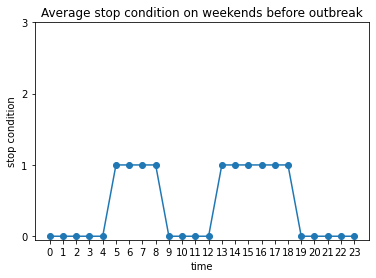

In [48]:
plot_predict_of_a_day(xgb_cv,"weekends")

In [49]:
cv=get_model_of_single_stop(X_stop1,y_stop1)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\ensemble\_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "c:\users\user\appdata\local\programs\python\python39\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(

KeyboardInterrupt: 

In [53]:
X_stop1


,Wind,hour,weekend,weather_condition_coded,daily_cases
time,,,,,
2021-03-30 00:00:01,0,0,0,2,0.0
2021-03-30 00:05:01,0,0,0,2,0.0
2021-03-30 00:10:01,1,0,0,2,0.0
2021-03-30 00:15:01,1,0,0,2,0.0
2021-03-30 00:20:01,1,0,0,2,0.0
...,...,...,...,...,...
2021-05-14 23:35:01,1,23,0,3,34.0
2021-05-14 23:40:01,1,23,0,3,34.0
2021-05-14 23:45:01,1,23,0,3,34.0


In [58]:
stop=merge.groupby('labeled_stop').get_group(0)
stop.drop(['labeled_stop','stop'],inplace=True,axis=1)
stop_1_X,stop_1_Y=get_target(stop)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [61]:
stop_1_X

,Wind,hour,minute,weekend,weather_condition_coded,daily_cases
time,,,,,,
2021-03-30 00:00:01,0,0,0,0,2,0.0
2021-03-30 00:05:01,0,0,5,0,2,0.0
2021-03-30 00:10:01,1,0,10,0,2,0.0
2021-03-30 00:15:01,1,0,15,0,2,0.0
2021-03-30 00:20:01,1,0,20,0,2,0.0
...,...,...,...,...,...,...
2021-05-14 23:35:01,1,23,35,0,3,34.0
2021-05-14 23:40:01,1,23,40,0,3,34.0
2021-05-14 23:45:01,1,23,45,0,3,34.0


In [89]:
import matplotlib
print(matplotlib.__file__)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\matplotlib\__init__.py


In [90]:
import matplotlib.font_manager
 
a = sorted([f.name for f in matplotlib.font_manager.fontManager.ttflist])
 
for i in a:
    print(i)

Agency FB
Agency FB
Agency FB
Agency FB
Algerian
Algerian
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial
Arial Rounded MT Bold
Arial Rounded MT Bold
Bahnschrift
Bahnschrift
Baskerville Old Face
Baskerville Old Face
Bauhaus 93
Bauhaus 93
Bell MT
Bell MT
Bell MT
Bell MT
Bell MT
Bell MT
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB
Berlin Sans FB Demi
Berlin Sans FB Demi
Bernard MT Condensed
Bernard MT Condensed
Blackadder ITC
Blackadder ITC
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Bodoni MT
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Book Antiqua
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookman Old Style
Bookshelf Symb

In [91]:
plt.rcParams['font.sans-serif'] = ['Noto Sans CJK TC']

In [102]:
def feature_selection(X,y,num_feat):
#     fig,axes=plt.subplots(3,figsize=(10,10))
#     rfe_rf=RFE(estimator=RandomForestRegressor(),n_features_to_select=1,verbose=1)#random forest
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#     rfe_rf.fit(X_train,y_train)
#     rf_mask=rfe_rf.support_
#     print(f"RandomForest-support:{rfe_rf.support_}")
#     print(f"RandomForest-ranking:{rfe_rf.ranking_}")
#     rf_score=[num_feat-i for i in rfe_rf.ranking_]
#     total_score=[rf_score[i] for i in range(0,num_feat)]
#     print(f"RF_total_score: {total_score}")
#     axes[0].plot(X.columns,total_score)
#     axes[0].set_xlabel("Features")
#     axes[0].set_ylabel("Importance")
#     axes[0].tick_params(labelrotation=45)
    
#     laCV=LassoCV() #LassoCV
    scaler=StandardScaler()
    X_train_std=scaler.fit_transform(X_train)
    X_test_std=scaler.fit_transform(X_test)
#     laCV.fit(X_train_std,y_train)
#     axes[1].plot(X.columns,np.absolute(laCV.coef_))
#     axes[1].set_xlabel("Features")
#     axes[1].set_ylabel("Importance")
#     axes[1].tick_params(labelrotation=45)
#     print(f"Lasocv:{laCV.coef_}")
#     print(f"lassoAlpha:{laCV.alpha_}")
    
    ridge = RidgeCV()
    ridge.fit(X_train_std, y_train)
    plt.figure(figsize=(10,4))
    line=plt.plot(["風","小時","分鐘","假日","天氣狀況","每日確診人數"],np.absolute(ridge.coef_))
    plt.xlabel("Features")
    plt.ylabel("Importance")
    plt.setp(line,marker="o")
    
    plt.xticks(rotation=45)
    print(f"Ridge Features sorted by their score:{ridge.coef_}")
    print(f"Ridgecv alpha:{ridge.alpha_}")
#     fig.tight_layout()
    
#     lcv_mask=np.absolute(laCV.coef_)>0.001
#     meta_mask=np.sum([lcv_mask,rf_mask],axis=0)#加總三個模型的投票結果
#     print(meta_mask)
#     mask=meta_mask>2
#     reduced_X=X.loc[:,mask]
#     print(reduced_X.columns)
#     return reduced_X

In [104]:
stop_1_X

,Wind,hour,minute,weekend,weather_condition_coded,daily_cases
time,,,,,,
2021-03-30 00:00:01,0,0,0,0,2,0.0
2021-03-30 00:05:01,0,0,5,0,2,0.0
2021-03-30 00:10:01,1,0,10,0,2,0.0
2021-03-30 00:15:01,1,0,15,0,2,0.0
2021-03-30 00:20:01,1,0,20,0,2,0.0
...,...,...,...,...,...,...
2021-05-14 23:35:01,1,23,35,0,3,34.0
2021-05-14 23:40:01,1,23,40,0,3,34.0
2021-05-14 23:45:01,1,23,45,0,3,34.0


Ridge Features sorted by their score:[ 0.02658479  0.08713387  0.00041846  0.13389    -0.11357352 -0.03279797]
Ridgecv alpha:10.0


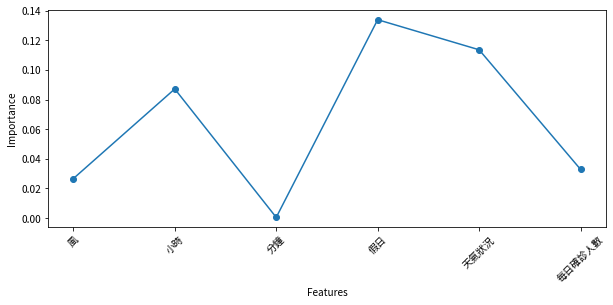

In [103]:
reduced_single_stop=feature_selection(stop_1_X,stop_1_Y,6)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler


def get_ovr_result(X,y):
    scaler=StandardScaler()
    X_scaled = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
    model_to_set = OneVsRestClassifier(SVC())
    parameters = {
        "estimator__C": [0.1,1],
        "estimator__kernel": ["poly",'rbf',"linear"],
        'estimator__gamma': [1,0.1]
    }
    model_tunning = GridSearchCV(model_to_set, param_grid=parameters)

    model_tunning.fit(X_train,y_train)

    score=model_tunning.score(X_test,y_test)
    y_pred=model_tunning.predict(X_test)
    print(score)
    print(classification_report(y_test, y_pred))
    print (model_tunning.best_params_)
    return model_tunning


#     X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=42)
#     steps=[('scaler',StandardScaler()),('rf',LogisticRegression(penalty='l1',
#                                                       solver='liblinear',
#                                                       class_weight='balanced',
#                                                       fit_intercept=True))]
#     pipeline=Pipeline(steps)
#     clf=OneVsRestClassifier(pipeline).fit(X_train,y_train)
#     score=clf.score(X_test,y_test)
#     y_pred=clf.predict(X_test)
#     print(classification_report(y_test, y_pred))
#     print(score)


In [ ]:
ovr_cv=get_ovr_result(X_stop1,y_stop1)


In [ ]:
plot_predict_of_a_day(ovr_cv)